# BCI Quant Take Home Assignment

This jupyter notebook will show the creation of each figure presented in the report


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
from utils import download_stocks, download_stock
import seaborn as sns


tickers = ['AAPL', 'AMZN', 'GOOG', 'INTC', 'ORCL', 'XOM', 'CVX', 'COP','HES', 'OXY']

date_start = '2012-01-01'
date_end = '2021-12-31'

## Q1. Normality

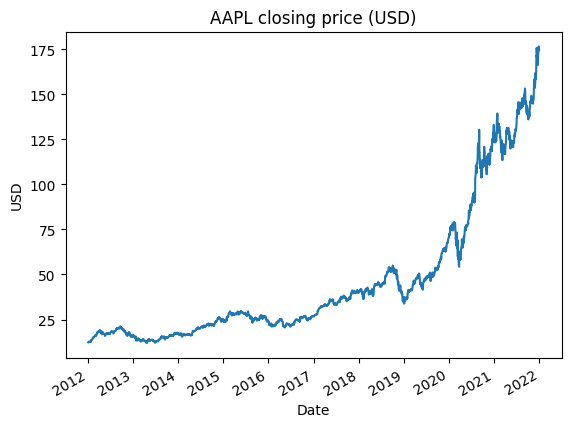

In [2]:
tname = 'AAPL'
ticker = yf.Ticker(tname)
pnl = ticker.history(start=date_start,
               		end = date_end)
close = pnl['Close']
plt.title(f"{tname} closing price (USD)")
plt.xlabel("Year")
plt.ylabel("USD")
close.plot()
plt.show()

### Graphical Tests

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_53570/3619974203.py:10: SyntaxWarning: invalid escape sequence '\m'
  title = f"PDF of Closing Price of {tname} with Fit Normal ($\mu$ = {mean : .2f}, $\sigma$ = {std : .2f})"
/tmp/ipykernel_53570/3619974203.py:10: SyntaxWarning: invalid escape sequence '\s'
  title = f"PDF of Closing Price of {tname} with Fit Normal ($\mu$ = {mean : .2f}, $\sigma$ = {std : .2f})"


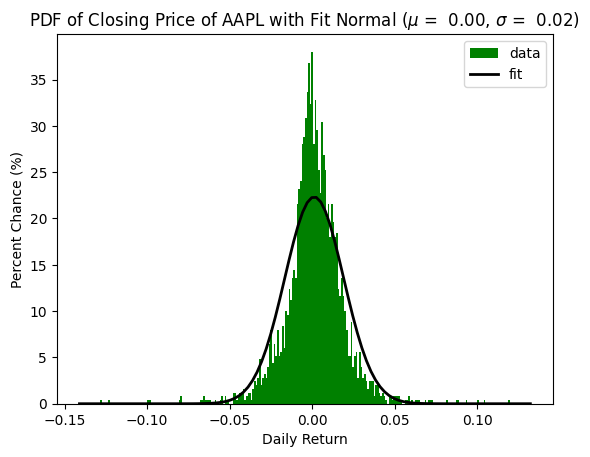

In [3]:
returns = close.pct_change().dropna().values #go from 0-1 to 0-100
mean, std = norm.fit(returns)

plt.hist(returns, bins=250, density=True, color='g', label="data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2, label="fit")
title = f"PDF of Closing Price of {tname} with Fit Normal ($\mu$ = {mean : .2f}, $\sigma$ = {std : .2f})"
plt.title(title)
plt.legend()

plt.xlabel("Daily Return")
plt.ylabel("Percent Chance (%)")
plt.show()

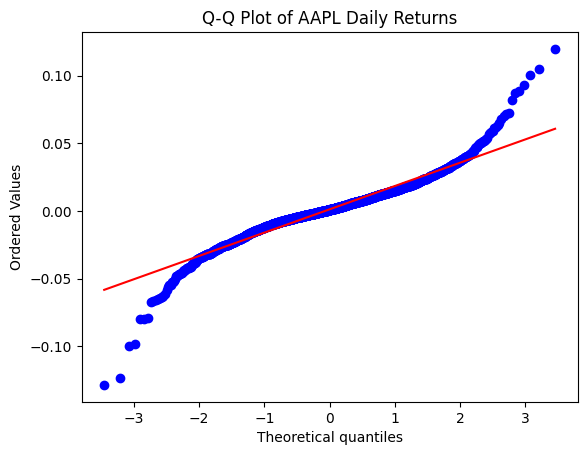

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(returns, dist="norm", plot=plt)
plt.title(f"Q-Q Plot of {tname} Daily Returns")
plt.show()

#TODO : add legend

### Quantative Values


In [5]:
## TODO: comptue Kurtosis, Skewness for hte JB test

## Q2. OLS  

In [6]:
# TODO: List the assumption for OLS, show why they do not apply and compute the params anyways for completeness

# Q3. Correlations  
First we download data thru a custom function (since HES is not on yfinance as it was delisted)

In [7]:
data = download_stocks(tickers, date_start, date_end)
returns = data.pct_change().dropna()

/home/abil/Documents/takehome-quant/utils.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)["Close"]
[*********************100%***********************]  1 of 1 completed
/home/abil/Documents/takehome-quant/utils.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)["Close"]
[*********************100%***********************]  1 of 1 completed
/home/abil/Documents/takehome-quant/utils.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)["Close"]
[*********************100%***********************]  1 of 1 completed
/home/abil/Documents/takehome-quant/utils.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)["Close"]
[*********************100%***********************]  1

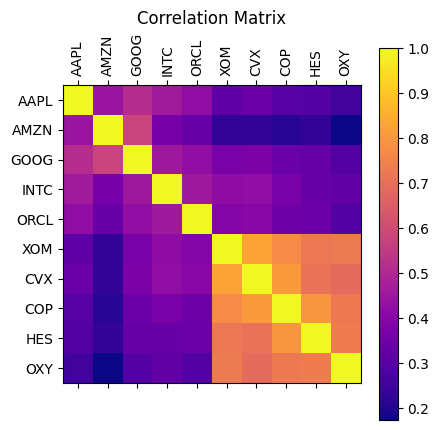

In [8]:
corr_matrix= returns.corr()
plt.matshow(corr_matrix, cmap="plasma")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

## Q4. K-means


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

q_returns =	(data
             .resample('QE')
             .last()
             .pct_change()
             .dropna(how="all")
             .tail(7))

X = q_returns.T.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2
random_state = 42
n_init = 10 #with the default 10 saw high variability when changin random state (small dataset)
kmeans = KMeans(n_clusters= n_clusters, n_init = n_init, random_state=random_state)
kmeans.fit(X_scaled)

clusters = pd.DataFrame({
    "Clusters":kmeans.labels_
}, index = X.index)

clusters


,Clusters
AAPL,0
AMZN,0
GOOG,0
INTC,0
ORCL,0
XOM,0
CVX,0
COP,0
HES,1
OXY,1


In [72]:
cluster_runs = []

for rs in range(1500):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=rs)
    kmeans.fit(X_scaled)
    cluster_runs.append(kmeans.labels_)

[]

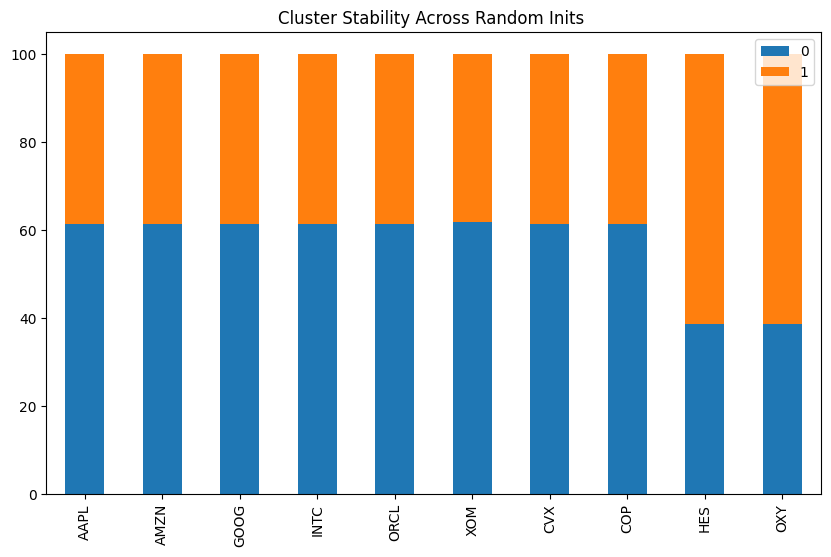

In [73]:
cluster_df = pd.DataFrame(cluster_runs, columns=X.index)
counter_per_ticker = cluster_df.apply(pd.Series.value_counts).fillna(0).astype(int)
prop_per_ticker = counter_per_ticker.div(len(cluster_df), axis=0) * 100
prop_per_ticker.T.plot(kind="bar", 
                       stacked=True, 
                       figsize=(10,6))

plt.title("Cluster Stability Across Random Inits ")
plt.plot()

## Q5. GMVP

## Possible Citations 
- http://rama.cont.perso.math.cnrs.fr/pdf/empirical.pdf 